In [1]:
# 加载matplotlib。pyplot库
import matplotlib.pyplot as plt
#让图形在notebook中自动显示
% matplotlib inline

# 加载pandas库（用于数据管理）
import pandas as pd
import numpy as np
# 加载seaborn库
import seaborn as sns
# 华文细黑是相对而言显示效果极好的中文字体
plt.rcParams["font.family"] = "STXIHEI"

#准备CCSS数据集
ccss = pd.read_excel("ccss_sample.xlsx")
ccss.head()

,time,id,s0,s2,s3,s4,s5,s7,s9,c0_1,...,Qs9,Qa3,Qa4,Qa8,Qa9,Qa10,Qa16,index1,index1a,index1b
0,200704,1,北京,男,20,本科,公司普通职员（白领）,未婚,2000-2999元,0,...,2500.0,100,200,200,200,100,100,109.349371,88.035919,121.071238
1,200704,2,北京,男,24,高中/中专,公司普通职员（白领）,未婚,6000-7999元,0,...,7000.0,100,100,100,150,200,100,93.728032,88.035919,96.856991
2,200704,3,上海,男,20,高中/中专,无业/待业/失业/家庭主妇,未婚,1000-1499元,0,...,1250.0,100,150,150,100,100,100,93.728032,88.035919,96.856991
3,200704,4,北京,女,65,大专,企/事业管理人员,已婚,1000-1499元,0,...,1250.0,150,150,100,100,100,200,109.349371,154.062858,84.749867
4,200704,5,上海,女,40,高中/中专,公司普通职员（白领）,已婚,99拒绝回答,0,...,NaN,100,100,100,100,150,100,85.917363,88.035919,84.749867


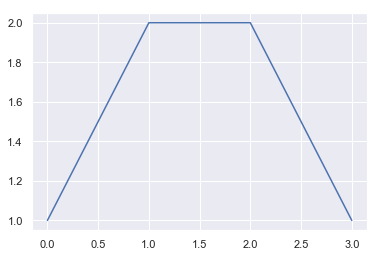

In [3]:
sns.set()
plt.plot([1,2,2,1], label = 'A line')

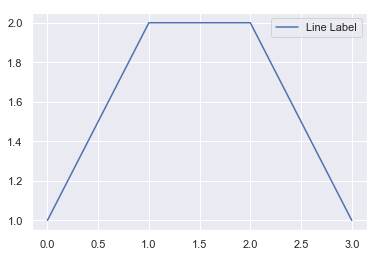

In [4]:
plt.plot([1,2,2,1])
plt.legend(['Line Label'])

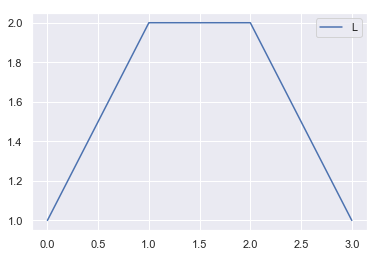

In [5]:
plt.plot([1,2,2,1])
plt.legend('Line Label')# 错误的设定方式

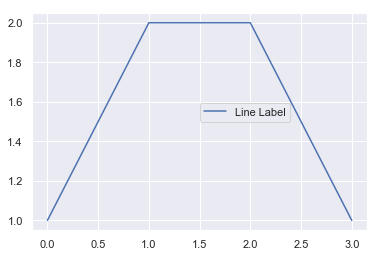

In [6]:
# 直接指定图例坐标
plt.plot([1,2,2,1])
plt.legend(['Line Label'], loc = (0.5, 0.5))

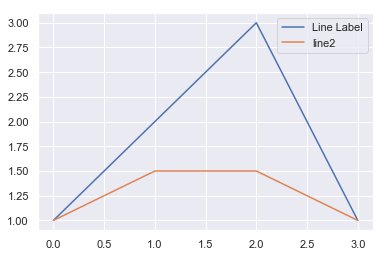

In [7]:
# 此处赋值时需要以逗号结尾， 否则返回的是对象列表
l1, = plt.plot([1,2,3,1], label = 'sfsad')
l2, = plt.plot([1,1.5,1.5,1])
plt.legend(handles = [l1,l2],
           labels = ['Line Label', 'line2'], loc = 'best')

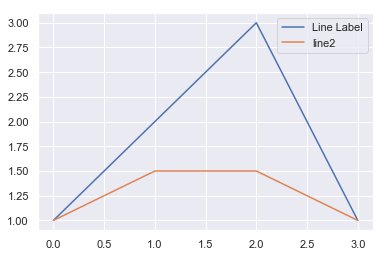

In [9]:
# 不加逗号则需要准确指定到列表的具体对象
l1 = plt.plot([1,2,3,1])
l2 = plt.plot([1,1.5,1.5,1])
plt.legend(handles = [l1[0],l2[0]],
           labels = ['Line Label', 'line2'], loc = 'best')

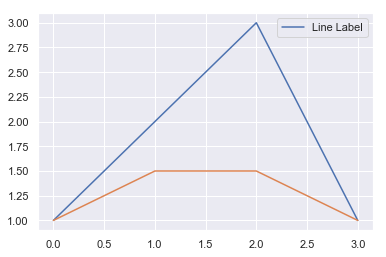

In [10]:
# 不加逗号则需要准确指定到列表的具体对象
l1 = plt.plot([1,2,3,1])
l2 = plt.plot([1,1.5,1.5,1])
# 只要求显示某些图形元素的标签
plt.legend(handles = [l1[0]],
           labels = ['Line Label', 'line2'], loc = 'best')

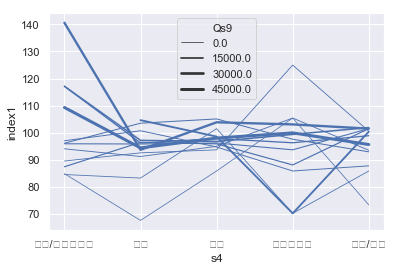

In [11]:
# 显示简化图例
sns.lineplot('s4', 'index1', data =ccss, size = 'Qs9', ci = None)

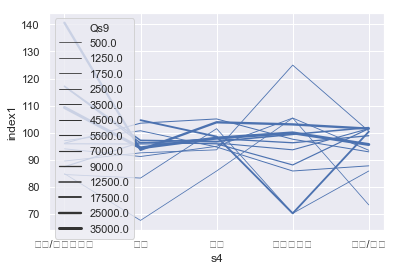

In [13]:
# 完整显示图例
sns.lineplot('s4', 'index1', data =ccss, size = 'Qs9',
             legend = 'full', ci = None)

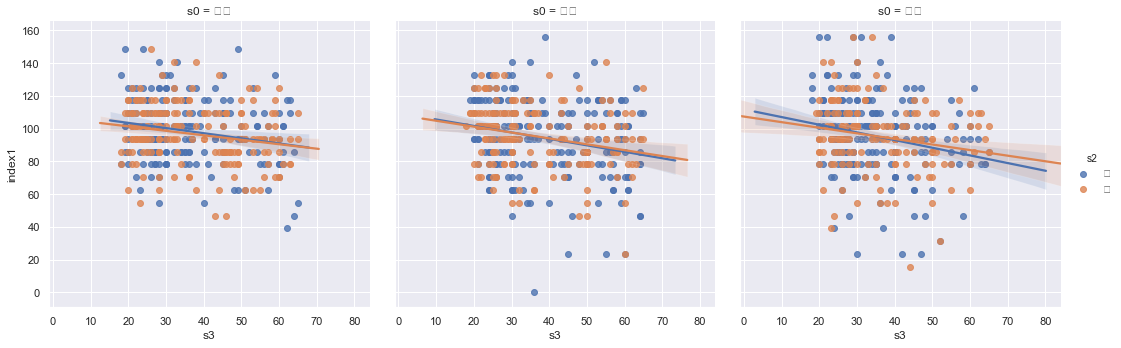

In [14]:
# 面板图形中图例显示在外部
sns.lmplot(x = 's3', y = 'index1', hue = "s2", col = "s0", data = ccss)

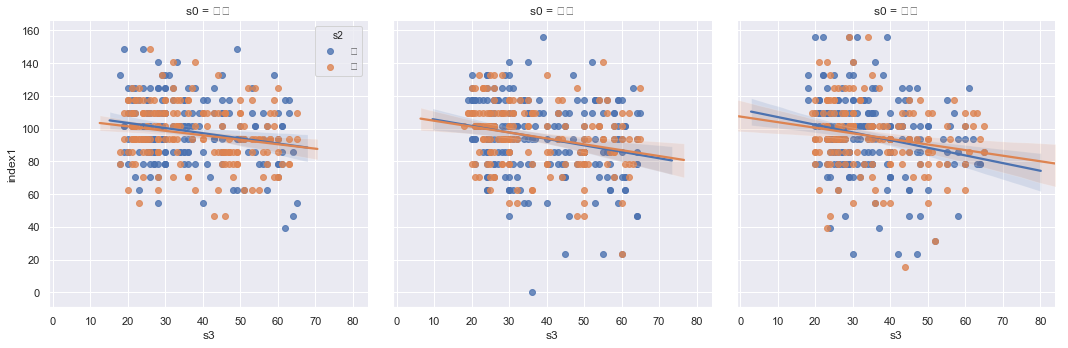

In [16]:
# 面板图形中图例显示在内部
sns.lmplot(x = 's3', y = 'index1', hue = "s2", col = "s0", 
           data = ccss, legend_out = False)

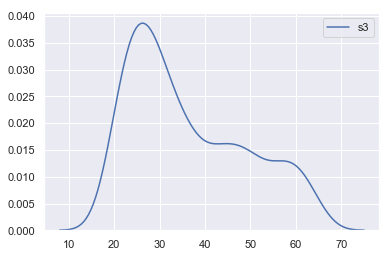

In [18]:
ax1 = sns.kdeplot(ccss.s3)

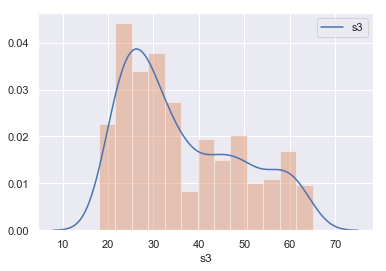

In [19]:
#  使用seaborn生成叠加图
ax1 = sns.kdeplot(ccss.s3)
sns.distplot(ccss.s3, kde = False, norm_hist = True, ax = ax1)

(array([ 0.02337272,  0.04489046,  0.03839804,  0.02096125,  0.01558181,
         0.01743679,  0.01558181,  0.01094437,  0.01558181,  0.01001688]),
 array([ 18. ,  22.7,  27.4,  32.1,  36.8,  41.5,  46.2,  50.9,  55.6,
         60.3,  65. ]),
 <a list of 10 Patch objects>)

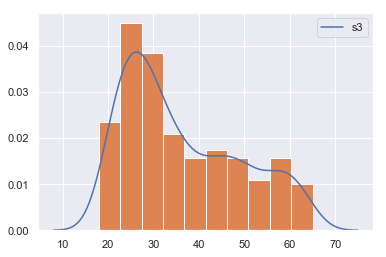

In [22]:
# 混合使用seaborn和matplotlib生成叠加图
ax1 = sns.kdeplot(ccss.s3)
ax1.hist(ccss.s3, density = True)

(array([ 0.02337272,  0.04489046,  0.03839804,  0.02096125,  0.01558181,
         0.01743679,  0.01558181,  0.01094437,  0.01558181,  0.01001688]),
 array([ 18. ,  22.7,  27.4,  32.1,  36.8,  41.5,  46.2,  50.9,  55.6,
         60.3,  65. ]),
 <a list of 10 Patch objects>)

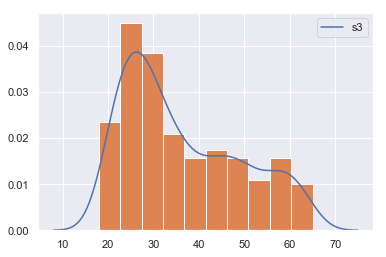

In [23]:
# 进一步的简化写法
sns.kdeplot(ccss.s3).hist(ccss.s3, density = True)

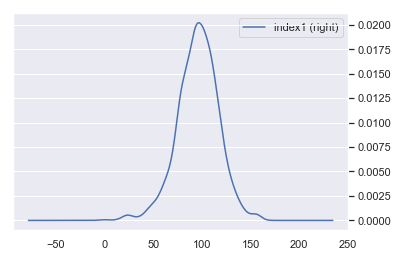

In [24]:
# 只使用第二y轴
ccss.plot.kde(y = 'index1', secondary_y = True)

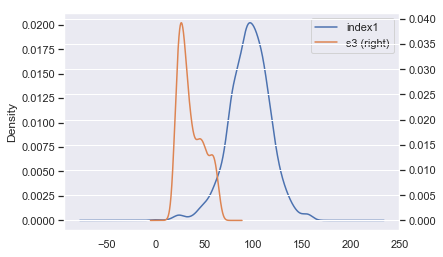

In [25]:
# 同时使用双轴， 并指定使用第二y轴的变量
ccss.loc[:, ['index1', 's3']].plot.kde(secondary_y = 's3')

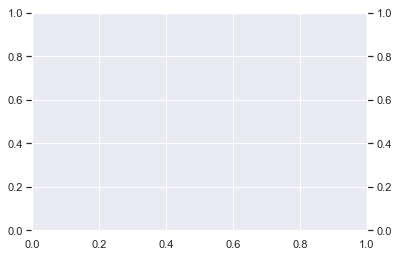

In [26]:
# 建立一个空白双轴图
plt.gca().twinx()

Text(0,0.5,'$S3$')

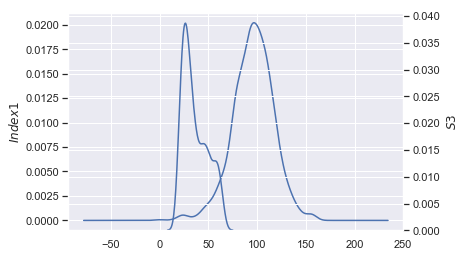

In [29]:
# 设置第一y轴对应的图形
ccss.index1.plot.kde(label = 'index1')
plt.gca().set_ylabel('$Index1$')

# 设置第二y轴对应的图形
ax2 = plt.gca().twinx()
sns.kdeplot(ccss.s3, legend = None, ax = ax2)
ax2.set_ylabel('$S3$')

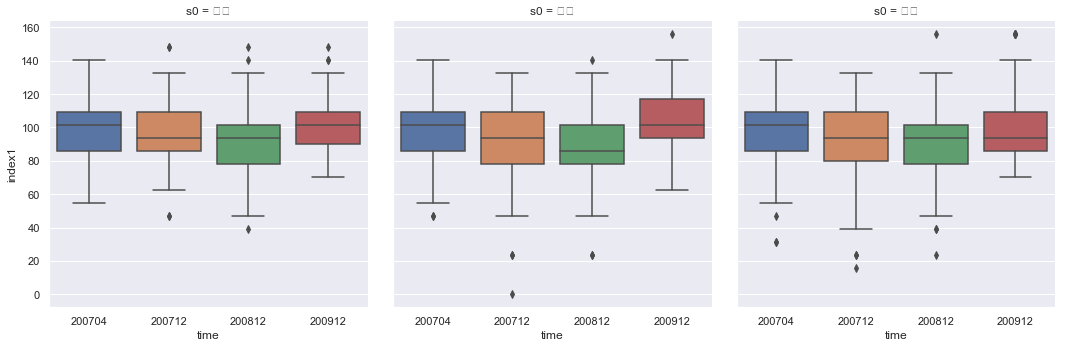

In [30]:
sns.catplot(x = 'time', y = 'index1', col = 's0', data = ccss,
            kind = "box")

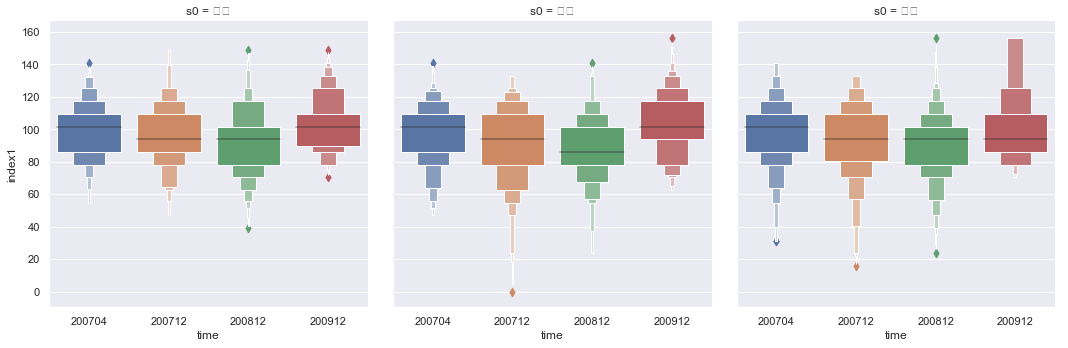

In [31]:
sns.catplot(x = 'time', y = 'index1', col = 's0', data = ccss,
            kind = "boxen")

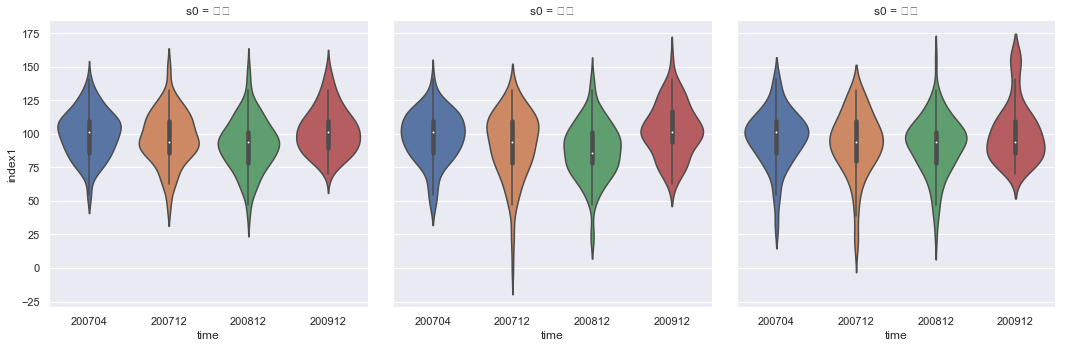

In [32]:
sns.catplot(x = 'time', y = 'index1', col = 's0', data = ccss,
            kind = "violin")

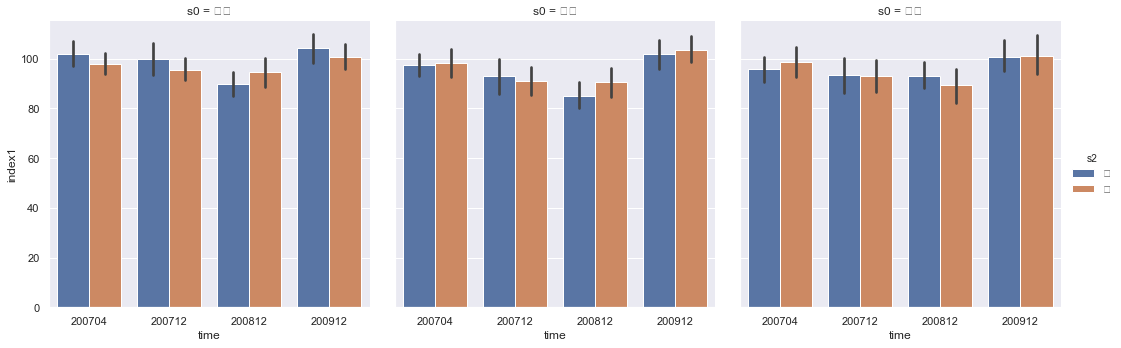

In [33]:
sns.catplot(x = 'time', y = 'index1', col = 's0', hue = 's2',
            data = ccss, kind = "bar")

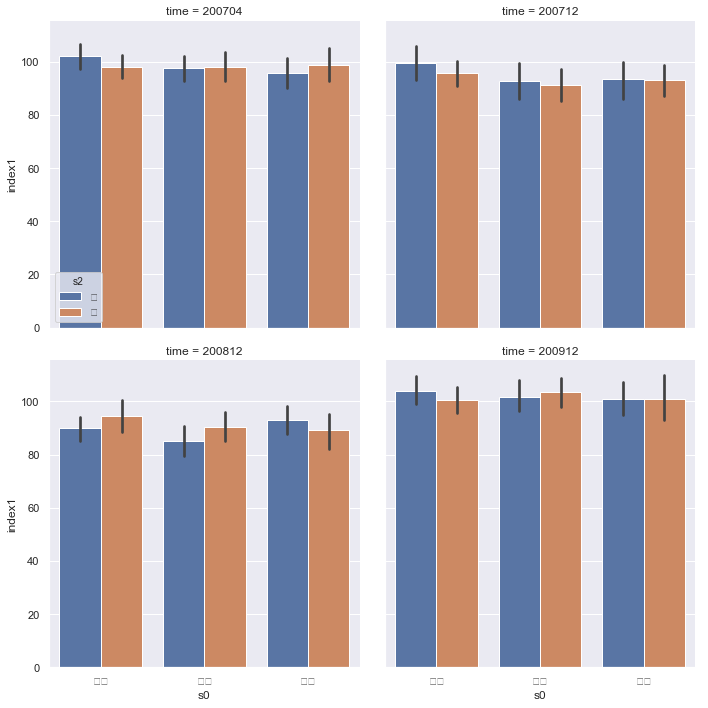

In [34]:
sns.catplot(x = 's0', y = 'index1', col = 'time', hue = 's2', 
            data = ccss, kind = "bar", col_wrap = 2, legend_out = False)